<a href="https://colab.research.google.com/github/aimlalchemists/aiml-hands-on/blob/main/AllLife_Bank_Personal_Loan_Campign_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Machine Learning: AllLife Bank Personal Loan Campaign</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>




<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Problem Statement</span>

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

In [1]:
# verify the version numbers of packages installed.
!pip freeze | grep numpy
!pip freeze | grep pandas
!pip freeze | grep matplotlib
!pip freeze | grep seaborn
!pip freeze | grep scikit-learn
!pip freeze | grep scipy

numpy==1.25.2
geopandas==0.13.2
pandas==2.0.3
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==2.0.3.230814
sklearn-pandas==2.2.0
matplotlib==3.7.1
matplotlib-inline==0.1.7
matplotlib-venn==0.11.10
seaborn==0.13.1
scikit-learn==1.2.2
scipy==1.11.4


In [2]:
# install necessary libraries.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Importing necessary libraries</span>

In [3]:
# Import libraries to read and manipulate the data
import pandas as pd
import numpy as np
# Import plotting libraries for visuals and statistic analysis.
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Import libraries for model predictions and decision trees.
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# To get different metrics scores
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

# To ignore the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import drive libraries to get data from google drive.
from google.colab import drive
drive.mount('/content/drive')

# Allows plots created with Matplotlib to be displayed directly in the notebook.
%matplotlib inline

# Sets the default parameters for plots.
sns.set()

Mounted at /content/drive


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Loading the dataset</span>

In [4]:
# read the data.
data = pd.read_csv("https://raw.githubusercontent.com/aimlalchemists/personal-loan-campaign-modelling/main/Loan_Modelling.csv")

# copy the data into df
df = data.copy()

# count of records.
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There is 5000 rows and 14 columns in this dataset.


In [5]:
# check first 5 rows of data
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# get the last 5 rows of data.
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Overview</span>

In [7]:
# Understand the not null, count and data type of the 14 columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### observations

- 13 columns int64 and one column float64.
- Personal_Loan is the dependent variable.
- Totally 5000 entries
- The Education and Family columns are currently an INT64 data type. This might not be suitable as those are often categorical, not numerical. Need to consider revising the data type for better data representation

In [8]:
# Describe the data
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# convert the Family and Education as Category column.
df.Family = df.Family.astype("category")
df.Education = df.Education.astype("category")

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.00,0.0,0.00,1.0


### Observations
- Looks like there are no missing values as per the count column. Still need to verify and confirm if there are any inappropriate values present.
- ID column may not be required if its just a sequence of numbers.
- Age values stand between 23 and 67, with an average of 45.
- Experience shows -3 as minimum, sounds incorrect.
- Not able to get a clarity on CreditCard column. If that's a boolean column, then better to change the name as HasCreditCard or IsCreditCardHolder.

In [11]:
# check for duplicates
df.duplicated().sum()

0

In [12]:
# check for na values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations
- No duplicates or na values

In [13]:
# Drop the ID column as that's not giving any value add in the data.
df.drop("ID", axis=1, inplace=True)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,NaN,NaN,NaN,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,NaN,NaN,NaN,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,NaN,NaN,NaN,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Observatinos
- There are 4 unique values for Family and 3 unique values for Education.
- There are only two unique values in Personal_Loan, Securities_Account, cd_Account, online and CreditCard columns.
- Age column has an average value of 45 with a standard deviation of approximately 11.4. The ages range from 23 to 67.
- Experience column has an average of 20 years with a standard deviation of 11.5 years. The experience ranges from -3 to 43 years. We will further examine the negative value.
- Income column has an average of 74K with a standard deviation of 46K. The income values span from 8K to 224K.
- Ccavg column has an average of 1.93 with a standard deviation of 1.7. The values in this column range from 0.0 to 10.0.
- Mortgage column has an average of 56.5K with a standard deviation of 101K. The standard deviation is larger than the mean, which warrants further investigation.
- There are zero values present in the mortgage column, which we will also inspect

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Exploratory Data Analysis.</span>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Univariant Analysis.

In [15]:
def detect_outliers(column: str, dataframe=df):
    """
    This function returns a DataFrame object of outliers in a specified feature.
    column: 1-dimensional feature array
    dataframe: pandas DataFrame (default is df)
    """
    # Calculate the first quartile of the feature
    Q1 = dataframe[column].quantile(0.25)

    # Calculate the third quartile of the feature
    Q3 = dataframe[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]

    return outliers


## Observations on age


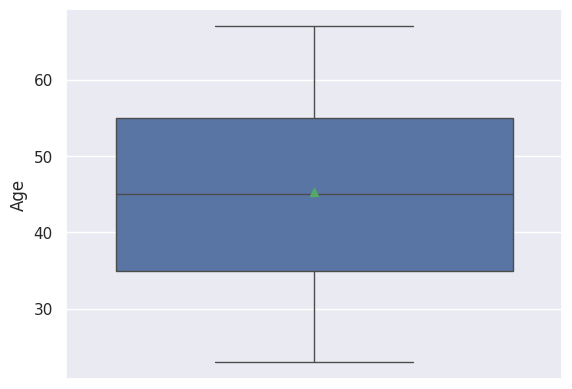

In [16]:
sns.boxplot(df.Age, showmeans=True)
plt.show()

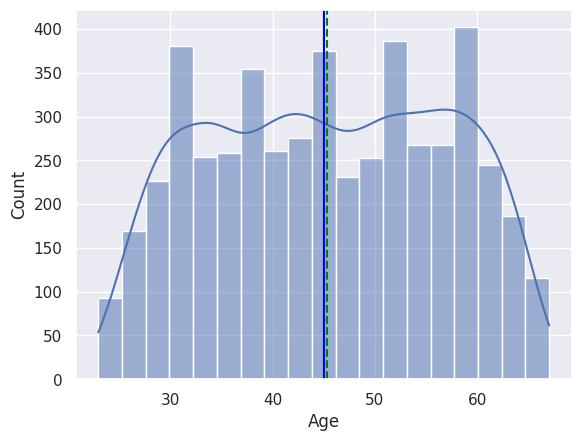

In [17]:
ax = sns.histplot(df.Age, kde=True)
ax.axvline(np.mean(df.Age), color='green', linestyle='--')
ax.axvline(np.median(df.Age), color='blue', linestyle='-')
plt.show()

- The age column does not contain any outliers.
- The average and median values are closely aligned.
- The mean age is approximately 45 years.
- The distribution of ages is evenly spread out.

## Observations on income

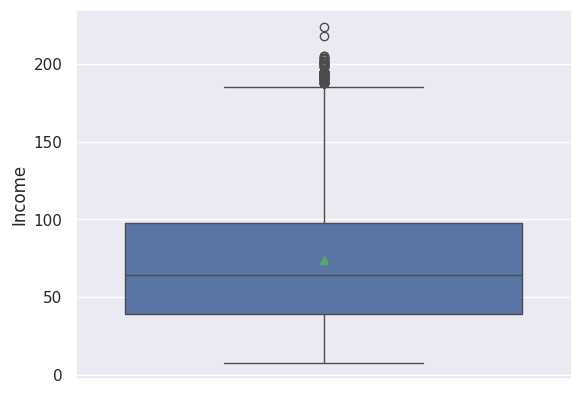

In [18]:
sns.boxplot(df.Income, showmeans=True)
plt.show()

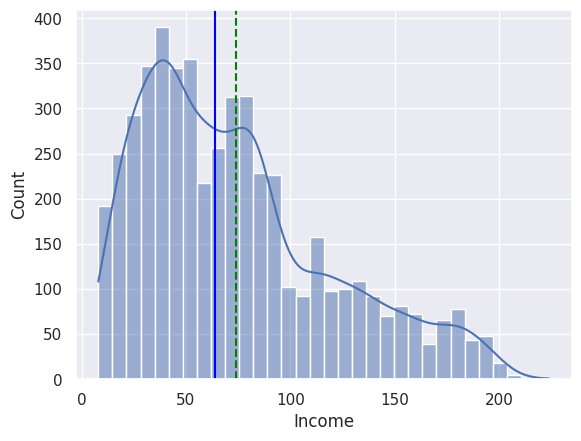

In [19]:
ax = sns.histplot(df.Income, kde=True)
ax.axvline(np.mean(df.Income), color='green', linestyle='--')
ax.axvline(np.median(df.Income), color='blue', linestyle='-')
plt.show()

In [20]:
outliers = detect_outliers('Income')
outliers.sort_values(by='Income', ascending=False).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
677,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
3804,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0


In [21]:
print(f"There are {outliers.shape[0]} outliers.")

There are 96 outliers.


- The mean income is approximately 60K, while the median income is slightly higher, around 70K.
- The distribution of income is skewed to the right, indicating that there are a significant number of individuals with income much higher than the average. - This is also evidenced by the presence of numerous outliers on the higher end of the income spectrum.
- There are 96 outliers.

## Observations on ccavg

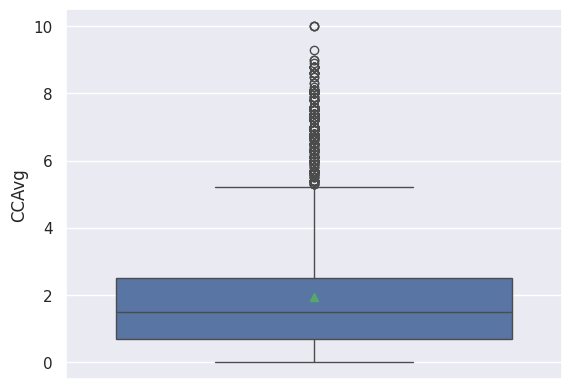

In [22]:
sns.boxplot(df.CCAvg, showmeans=True)
plt.show()

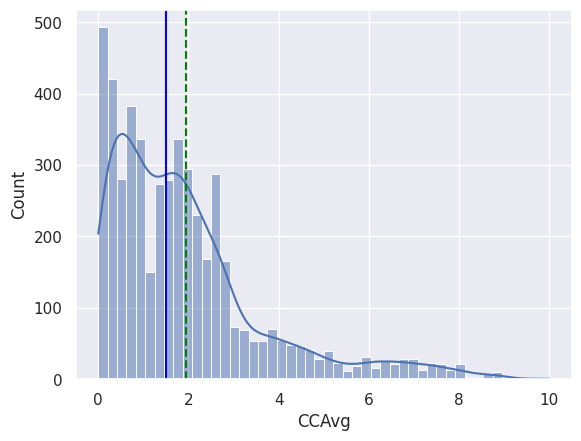

In [23]:
ax = sns.histplot(df.CCAvg, kde=True)
ax.axvline(np.mean(df.CCAvg), color='green', linestyle='--')
ax.axvline(np.median(df.CCAvg), color='blue', linestyle='-')
plt.show()

In [24]:
outliers = detect_outliers('CCAvg')
outliers.sort_values(by='CCAvg', ascending=False).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2337,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
3943,61,36,188,91360,1,9.3,2,0,1,0,0,0,0
3822,63,33,178,91768,4,9.0,3,0,1,0,0,0,0
1339,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1277,45,20,194,92110,2,8.8,1,428,0,0,0,0,0
3312,47,22,190,94550,2,8.8,1,0,0,0,0,0,0
4225,43,18,204,91902,2,8.8,1,0,0,0,0,1,0


In [25]:
print(f"There are {outliers.shape[0]} outliers.")

There are 324 outliers.


- The ‘CCAvg’ column has a mean value of approximately 1.5 and a median value close to 2.
- The distribution of ‘CCAvg’ is skewed towards the right, indicating a higher frequency of larger values.
- Additionally, there are 324 outliers on the higher end of the ‘CCAvg’ spectrum.

## Observations on mortgage

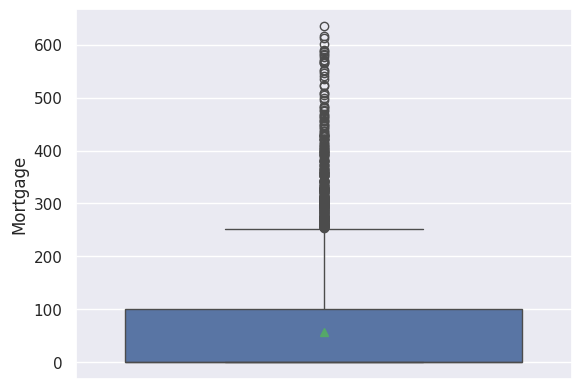

In [27]:
sns.boxplot(df.Mortgage, showmeans=True)
plt.show()

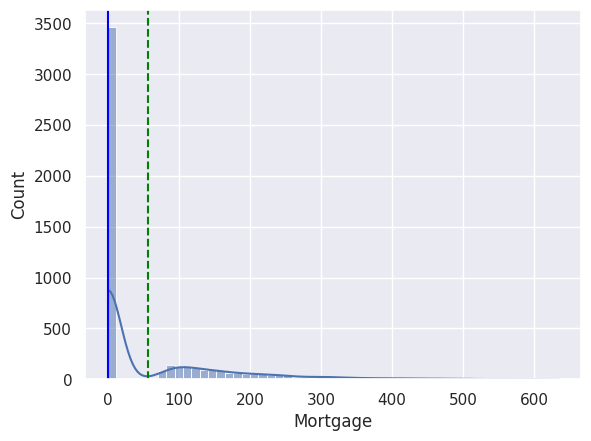

In [28]:
ax = sns.histplot(df.Mortgage, kde=True)
ax.axvline(np.mean(df.Mortgage), color='green', linestyle='--')
ax.axvline(np.median(df.Mortgage), color='blue', linestyle='-')
plt.show()

In [29]:
outliers = detect_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2934,37,13,195,91763,2,6.5,1,635,0,0,0,1,0
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
4812,29,4,184,92126,4,2.2,3,612,1,0,0,1,0
1783,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
4842,49,23,174,95449,3,4.6,2,590,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,25,-1,101,94720,4,2.3,3,256,0,0,0,0,1
3950,38,14,62,94143,1,1.5,3,255,0,0,0,1,0
2159,61,35,99,94085,1,4.8,3,255,1,0,0,0,1
3138,36,11,103,93555,1,4.6,1,255,0,0,0,1,0


In [30]:
print(f"There are {outliers.shape[0]} outliers in the outlier column.")

There are 291 outliers in the outlier column.


- The ‘Mortgage’ column contains numerous entries that, while not null, have a value of zero.
- We will delve deeper into this. Additionally, the ‘Mortgage’ column exhibits a 291 outliers.

## Observation on Experience.

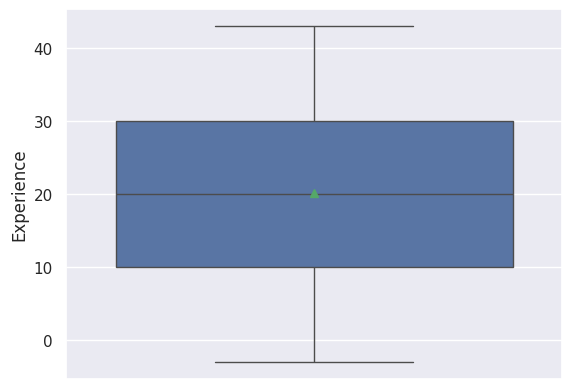

In [32]:
sns.boxplot(df.Experience, showmeans=True)
plt.show()

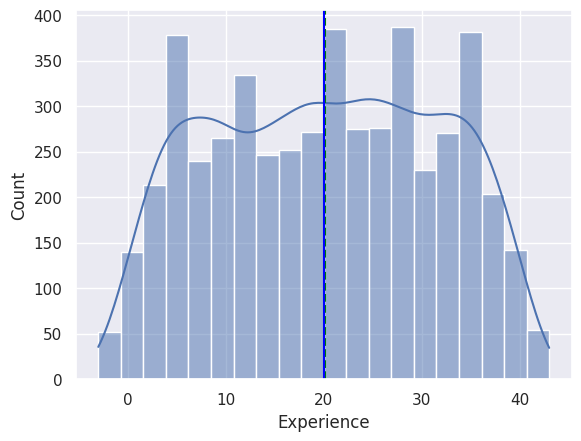

In [33]:
ax = sns.histplot(df.Experience, kde=True)
ax.axvline(np.mean(df.Experience), color='green', linestyle='--')
ax.axvline(np.median(df.Experience), color='blue', linestyle='-')
plt.show()

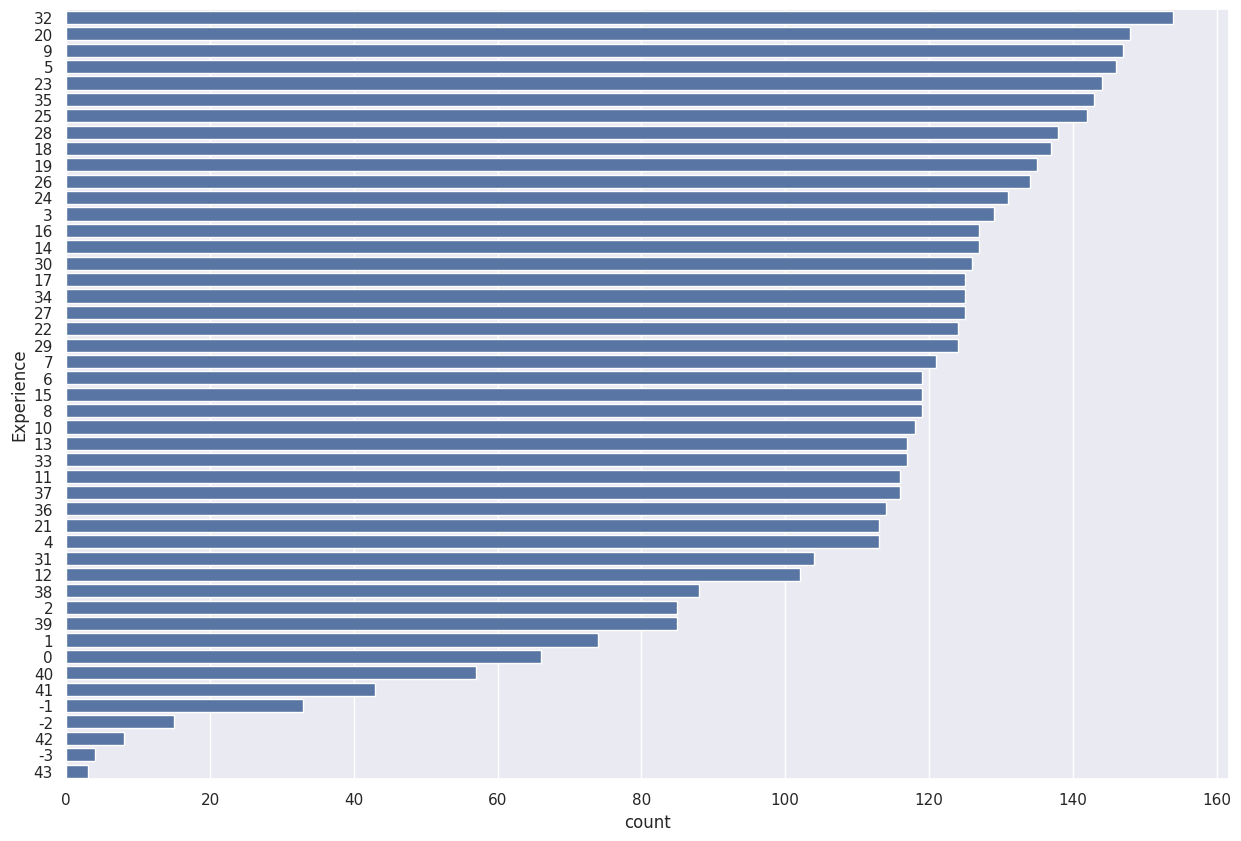

In [34]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df.Experience,
              data=df,
              order=df.Experience.value_counts().index[:]);

- 32 years of experience is high in numbers.
- Plot has -1,-2 and -3 values for experience, which is incorrect.

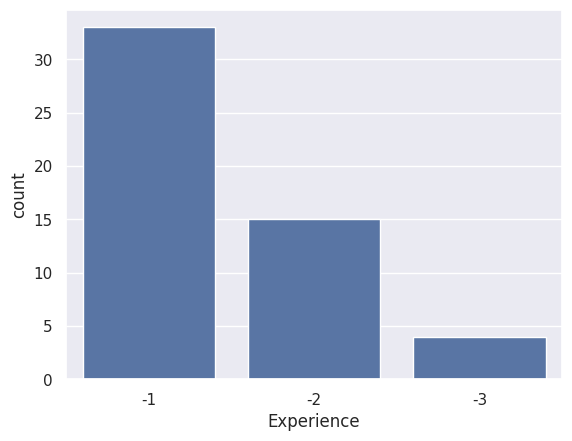

In [43]:
# Filter the dataframe to include only rows where Experience is less than 0
negative_experience = df[df['Experience'] < 0]

# Create a countplot
sns.countplot(x=negative_experience['Experience'], order=negative_experience['Experience'].value_counts().index)

# Show the plot
plt.show()


- Looks like the negative experience values are data errors.
- As the count looks like, we can safely convert these into a positive values.
- Create a new column Abs_Experience to convert the negative values to positive.

In [46]:
df['Abs_Experience'] = np.abs(df.Experience)
df.sort_values(by='Abs_Experience', ascending=False).head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Abs_Experience
2846,67,43,105,93711,4,1.7,2,0,0,0,0,1,0,43
3886,67,43,79,95616,4,1.7,2,215,0,0,1,1,1,43
4360,67,43,41,90024,2,1.1,1,0,0,0,0,0,0,43
4172,67,42,75,90041,4,0.1,2,182,0,0,0,1,0,42
734,66,42,53,92182,2,1.1,1,0,0,0,0,1,1,42


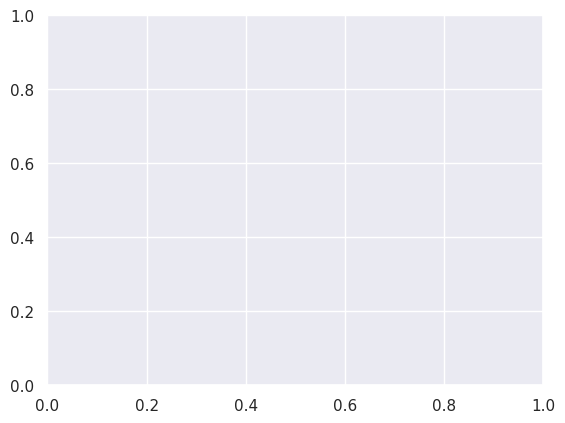

In [47]:
# Filter the dataframe to include only rows where Experience is less than 0
negative_experience = df[df['Abs_Experience'] < 0]

# Create a countplot
sns.countplot(x=negative_experience['Abs_Experience'], order=negative_experience['Abs_Experience'].value_counts().index)

# Show the plot
plt.show()

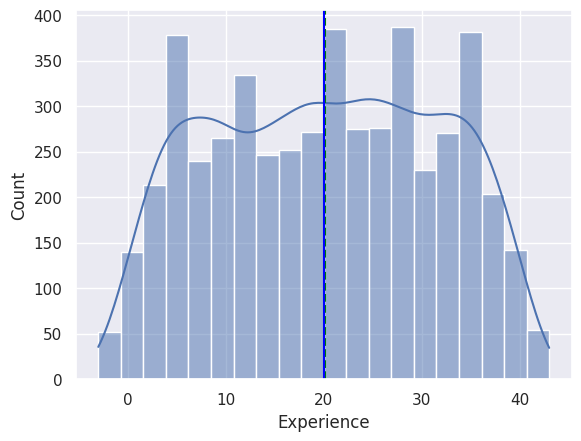

In [48]:
ax = sns.histplot(df.Experience, kde=True)
ax.axvline(np.mean(df.Experience), color='green', linestyle='--')
ax.axvline(np.median(df.Experience), color='blue', linestyle='-')
plt.show()

- No more negative values.
- The change also not changed the distribution curve.

## Observation on ZIPCode

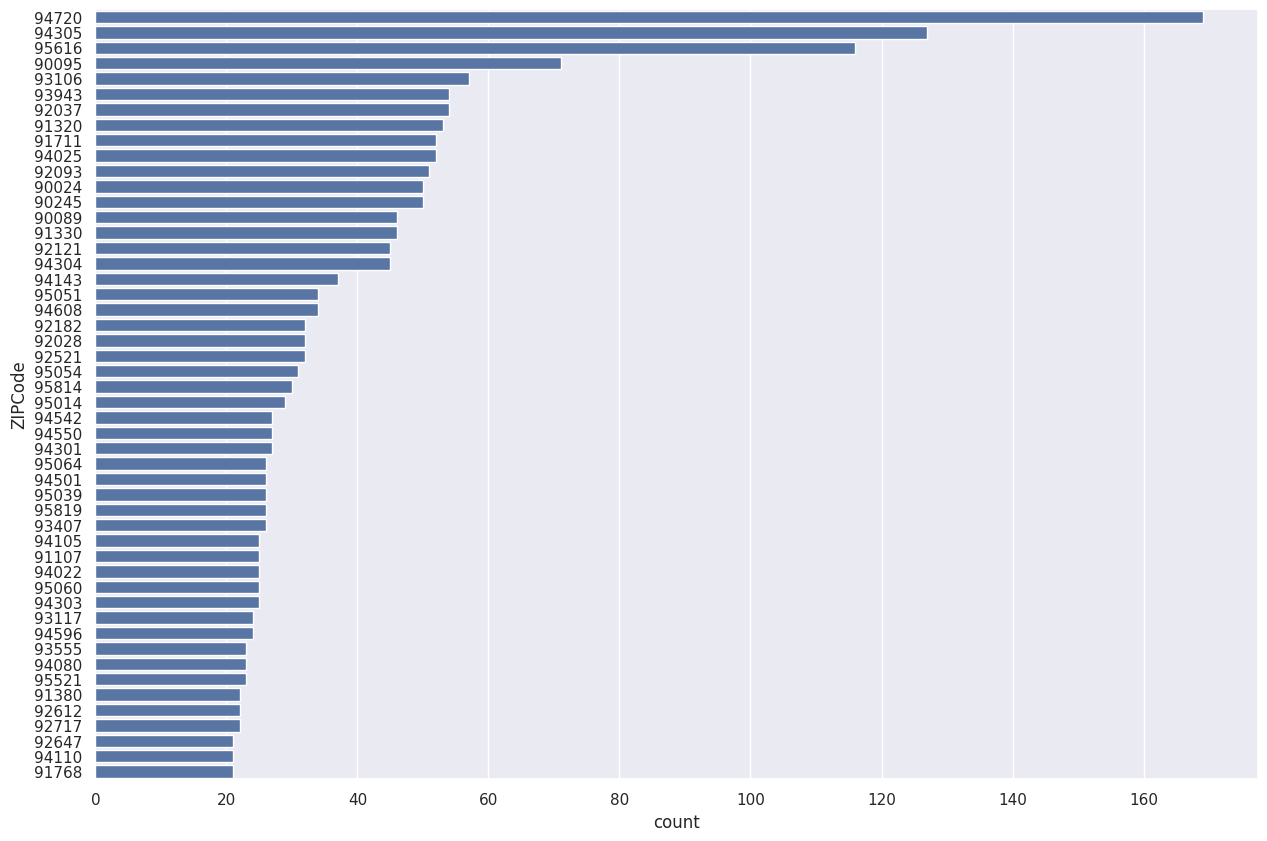

In [63]:
plt.figure(figsize=(15, 10))
sns.countplot(y="ZIPCode", data=df, order=df.ZIPCode.value_counts().index[0:50]);

- 94720 ZIPCode has more number of data (more than 160+)

In [72]:
def annotate_percentage_on_bar(plot, feature):
    """
    This function annotates the percentage of each bar in a bar plot.
    feature: categorical feature
    Note: This function won't work if a column is passed in hue parameter.
    """
    # Calculate the total number of instances for the percentage calculation
    total = len(feature)

    # Loop over each bar in the plot
    for bar in plot.patches:
        # Calculate the percentage of each class of the category
        percentage = 100 * bar.get_height() / total
        # Format the percentage to a string
        percentage_label = f"{percentage:.1f}%"

        # Calculate the center x-coordinate of the bar for the annotation
        x = bar.get_x() + bar.get_width() / 2 - 0.05
        # Calculate the y-coordinate of the bar for the annotation
        y = bar.get_y() + bar.get_height()

        # Annotate the percentage on the bar
        plot.annotate(percentage_label, (x, y), size=12)

    # Display the plot
    plt.show()


## Observations on Family.

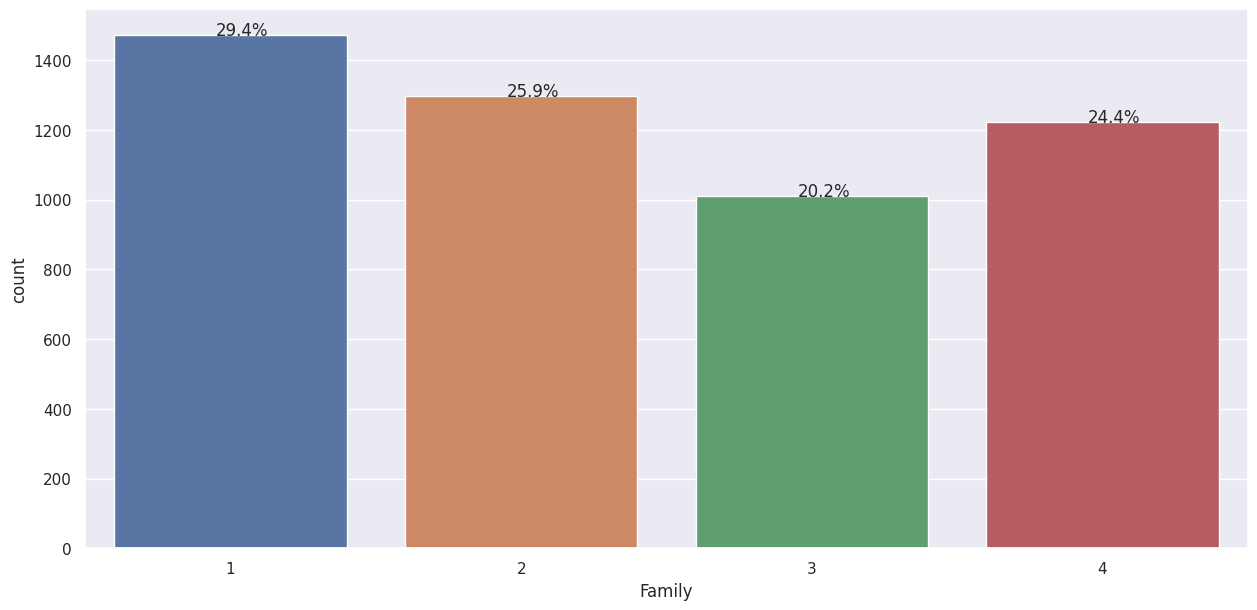

In [82]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Family' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Family, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Family)


- In the family column, the category with the most representation is 1, accounting for 29.4% of the data.
- The next most common category is a family size of 2, followed by 4.
- The least represented category in our dataset is a family size of 3.

## Observations on Education.

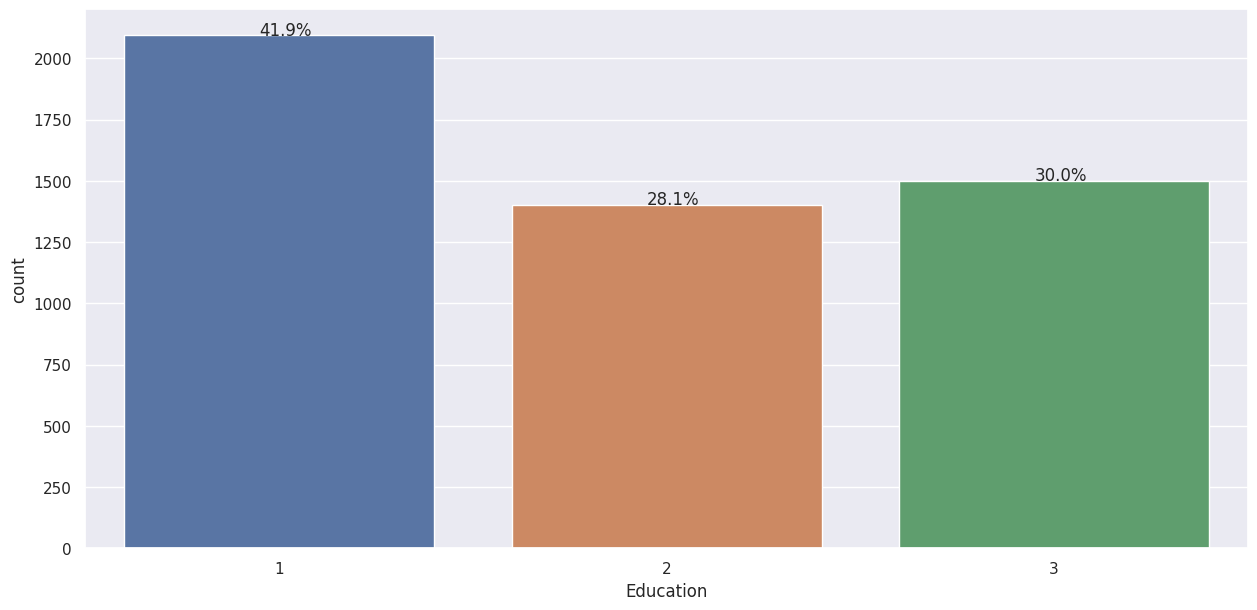

In [83]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Education' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Education, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Education)


- The education column is divided into three categories.
- The most prevalent category is Category 1, which constitutes 41.9% of the data.
- This is followed by Category 3, which makes up 30% of the data.
- Category 2 is the third, accounting for 28.1% of the data.

## Observation on Personal_Loan.

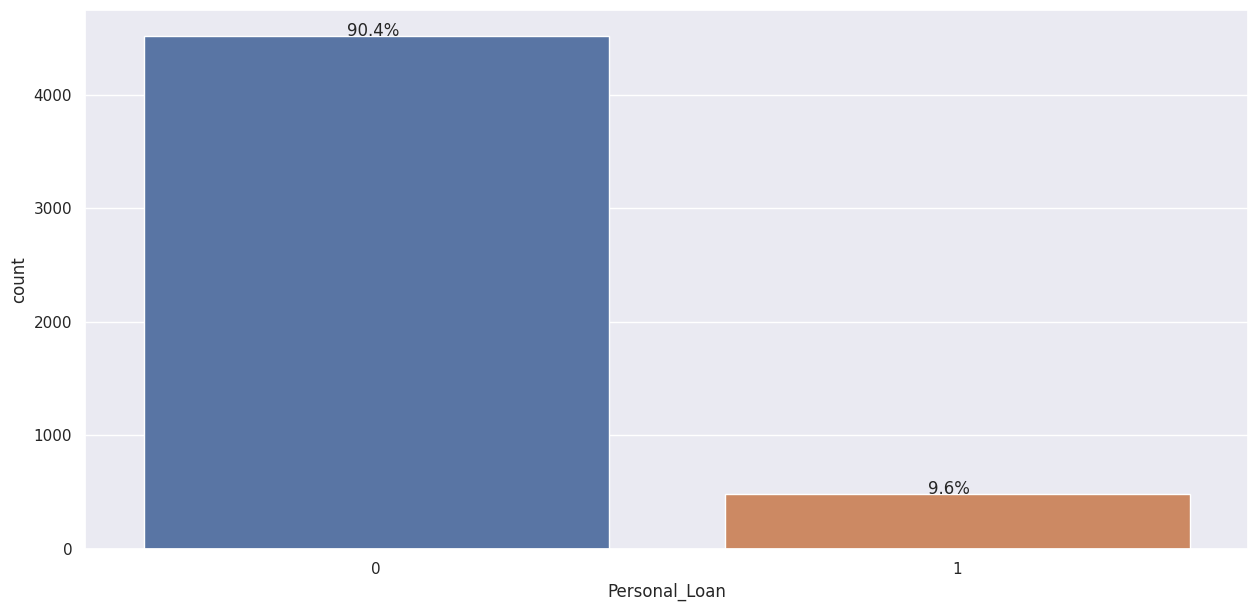

In [84]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Personal_Loan' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Personal_Loan, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Personal_Loan)


- Personal_Loan 0 represents the individuals who have not taken a personal loan, accounting for 90.4% of the data.

## Observation on Securities_Account

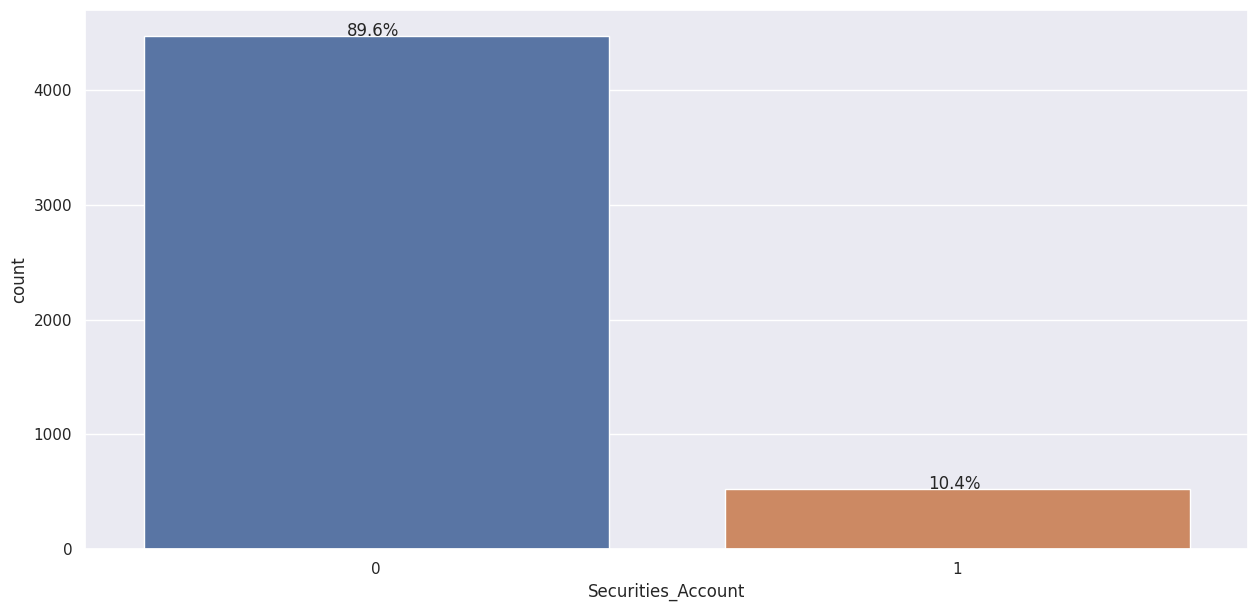

In [85]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Personal_Loan' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Securities_Account, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Securities_Account)

- The largest proportion of customers, at 89.6%, do not have a securities account.

## Observations on CD_Account

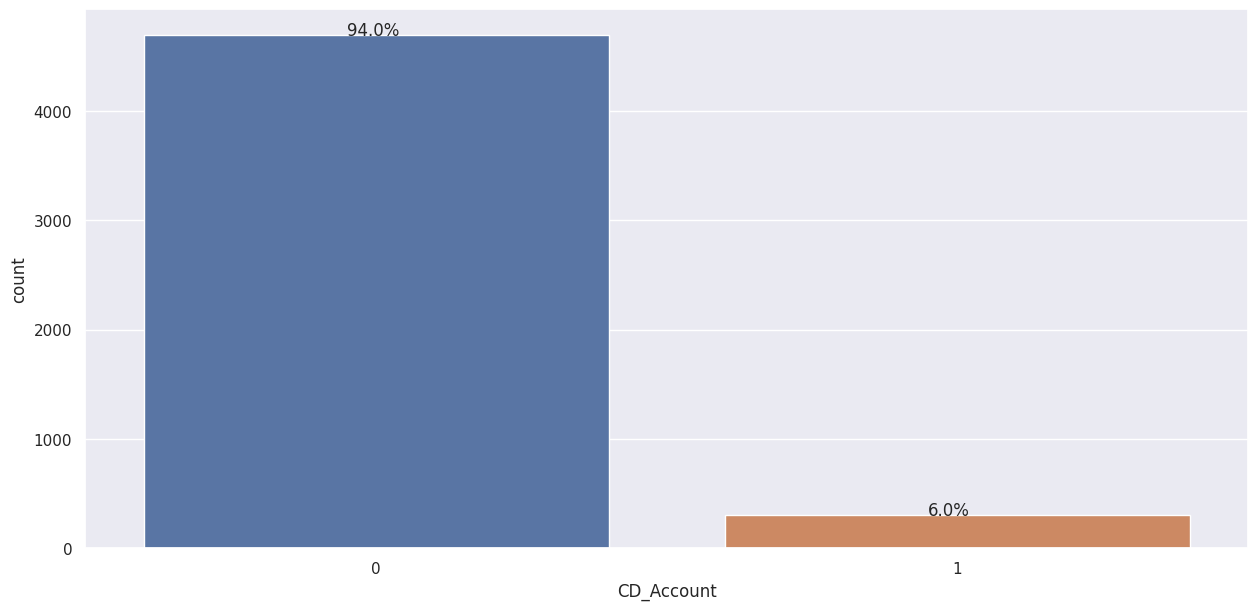

In [86]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'CD_Account' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.CD_Account, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.CD_Account)

- Customers with out CD_Account is 94%.

## Observations on Online.

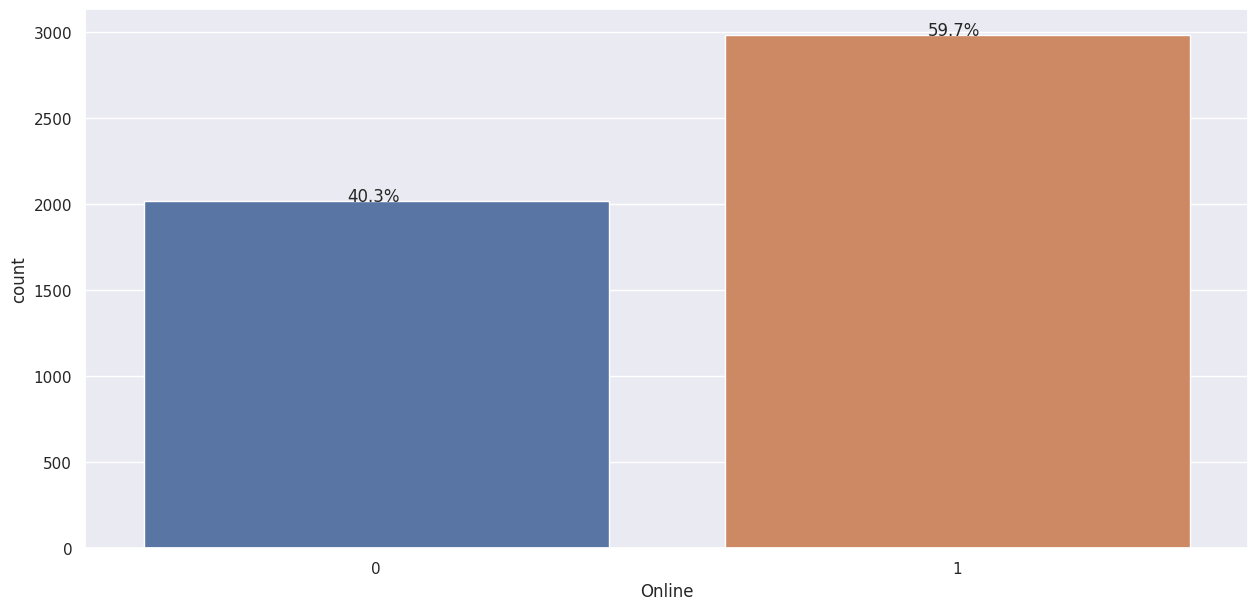

In [87]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Online' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Online, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Online)

- Customers use Online banking is 59.7%.

## Observation on CreditCard.

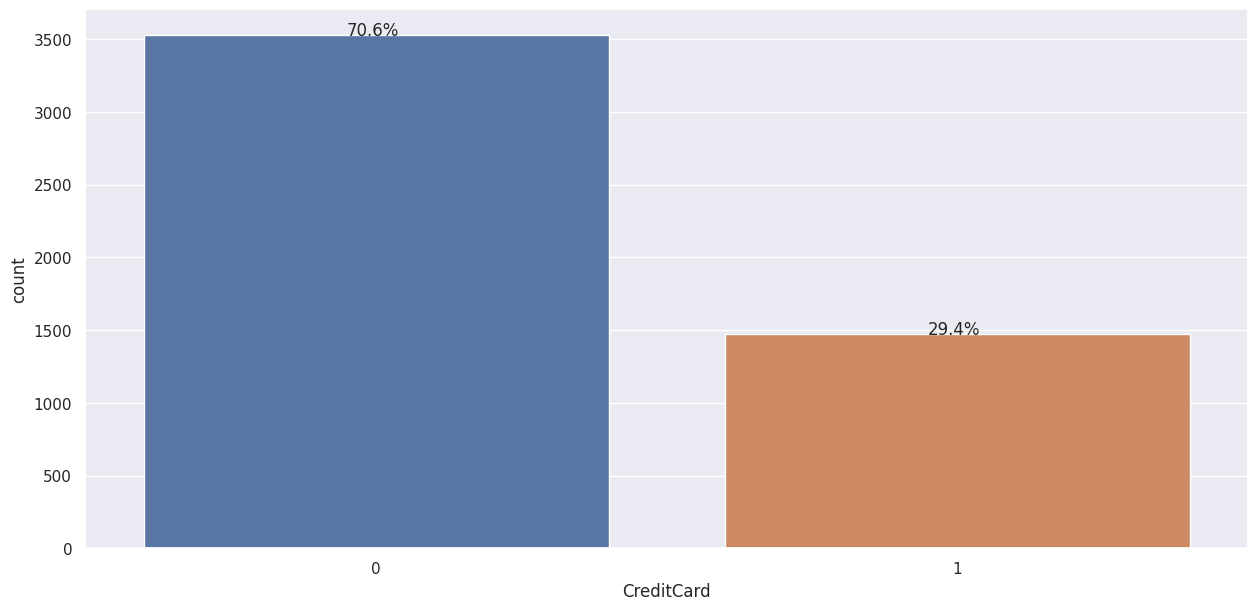

In [88]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'CreditCard' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.CreditCard, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.CreditCard)

- Customers not having Credit Card is 70.6%

## Distributions of numerical columns

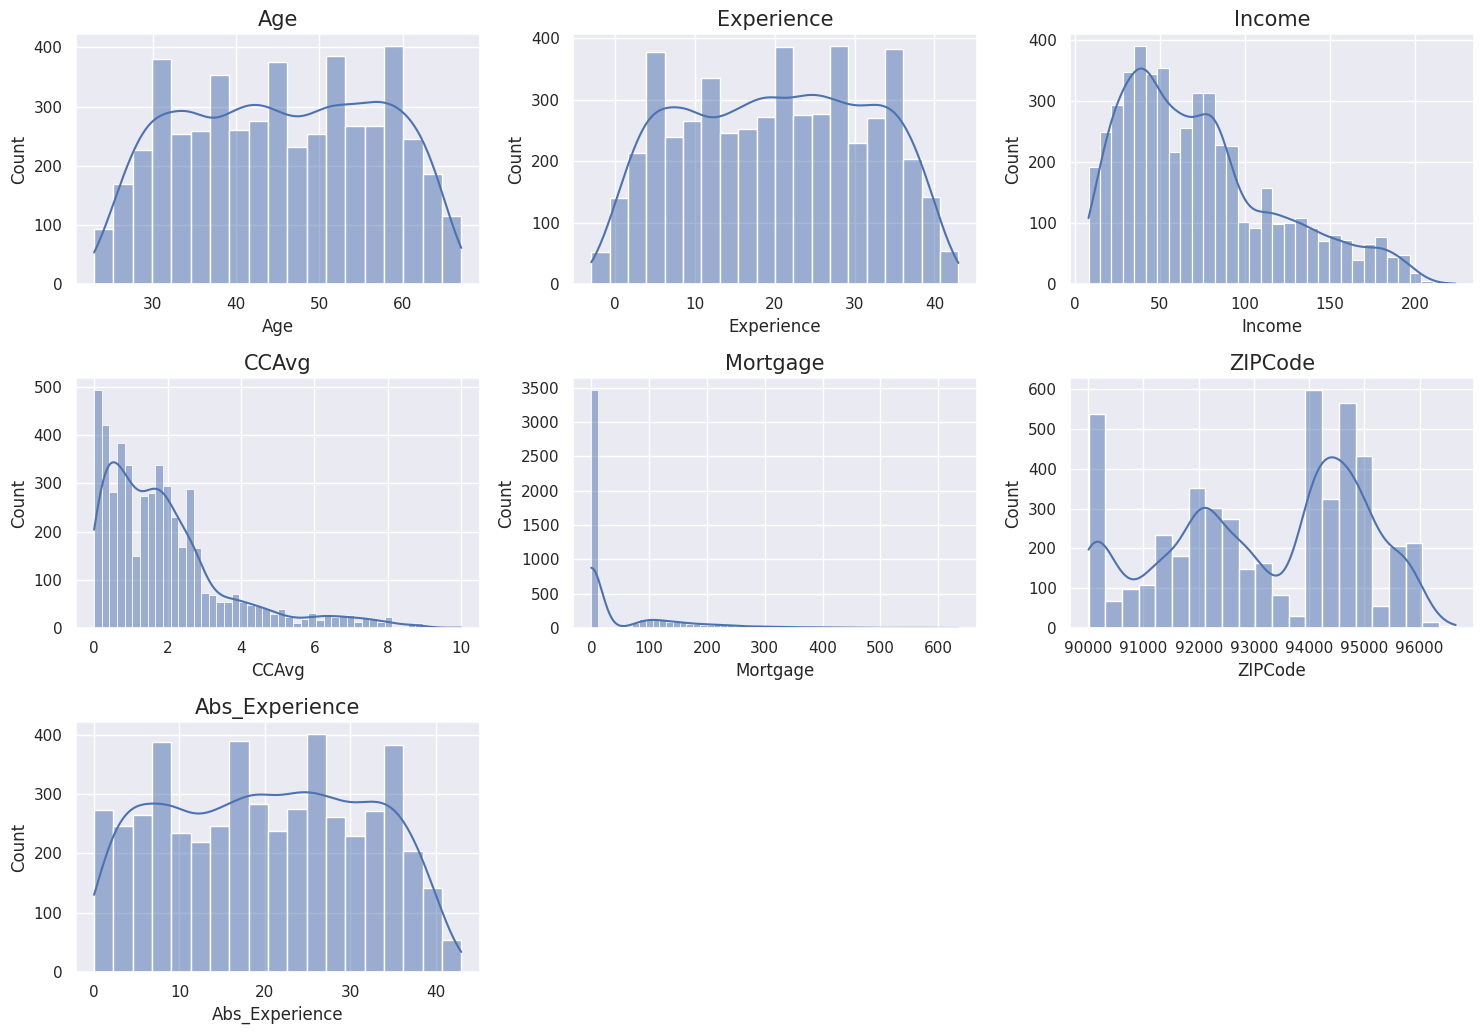

In [93]:
# List of features to plot
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode', 'Abs_Experience']

# Calculate the number of rows needed for the subplot grid
n_rows = math.ceil(len(features) / 3)

# Create a figure with the appropriate size
plt.figure(figsize=(15, n_rows * 3.5))

# Loop over each feature
for i, feature in enumerate(features):
    # Create a subplot for each feature
    plt.subplot(n_rows, 3, i + 1)

    # Plot a histogram of the feature
    sns.histplot(df[feature], kde=True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Set the title of the subplot
    plt.title(feature, fontsize=15)

# Display the plot
plt.show()


## Dispersion of numerical columns



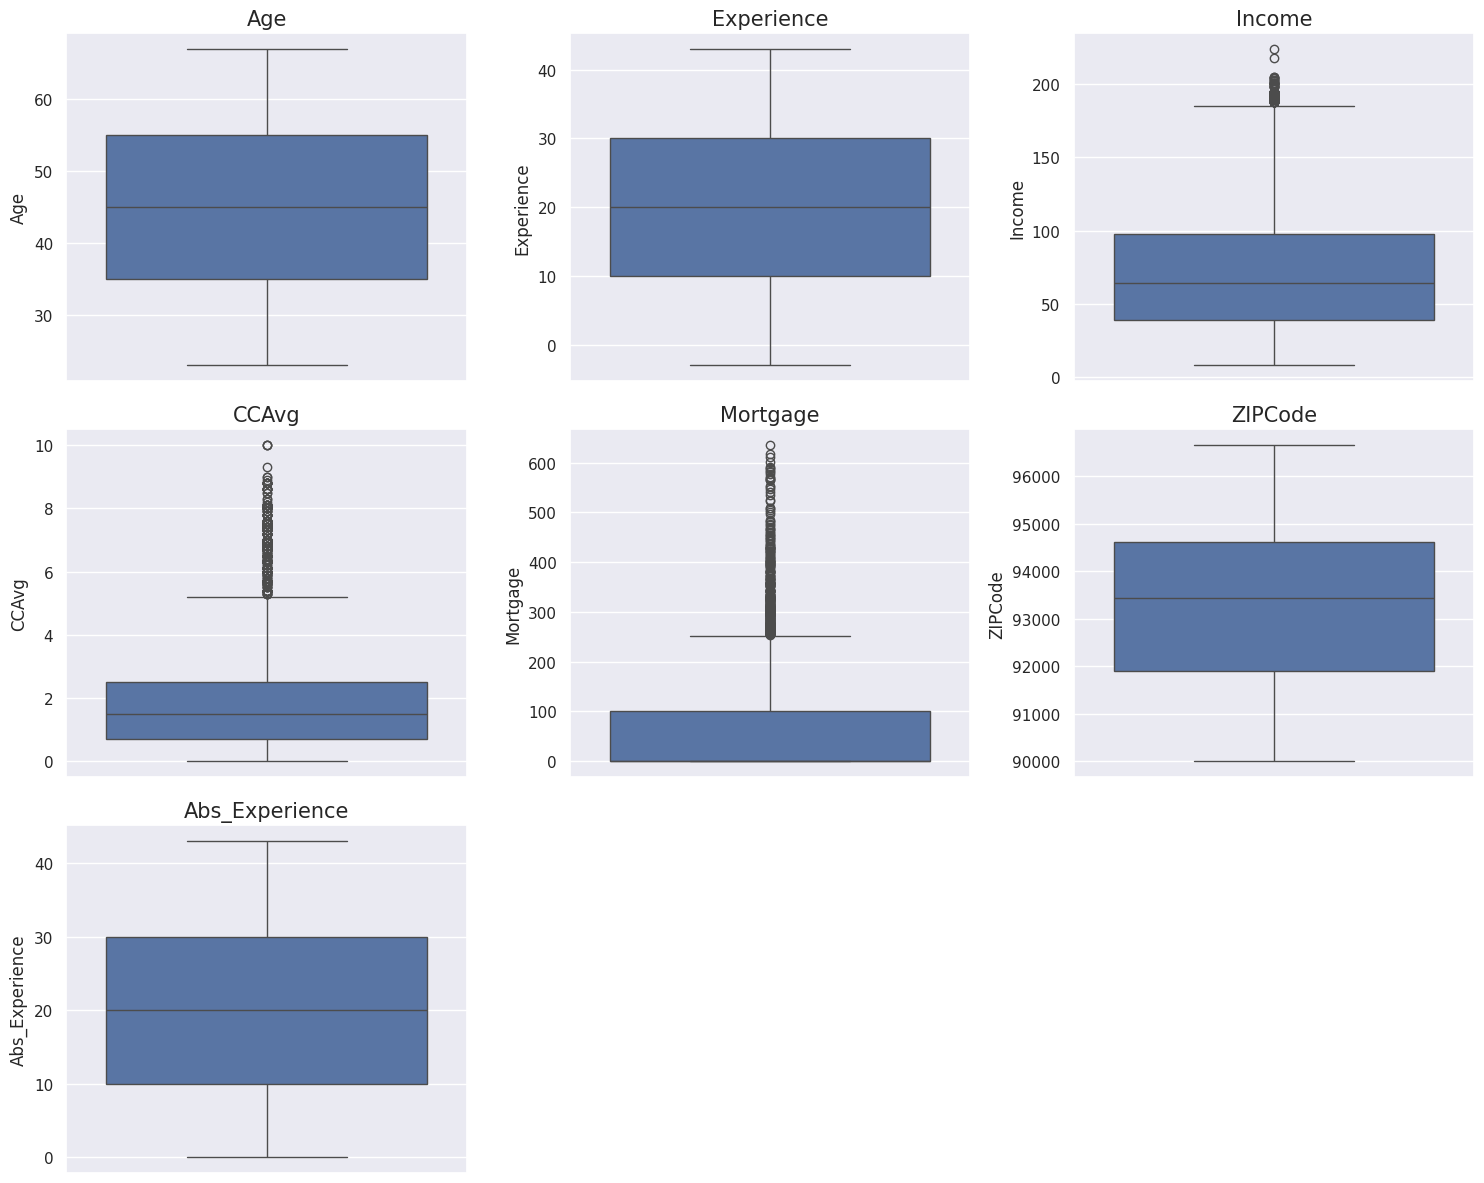

In [90]:
# List of features to plot
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode', 'Abs_Experience']

# Calculate the number of rows needed for the subplot grid
n_rows = math.ceil(len(features) / 3)

# Create a figure with the appropriate size
plt.figure(figsize=(15, n_rows * 4))

# Loop over each feature
for i, feature in enumerate(features):
    # Create a subplot for each feature
    plt.subplot(n_rows, 3, i + 1)

    # Plot a boxplot of the feature using seaborn
    # The 'whis' parameter is set to 1.5 to define the threshold for outliers
    sns.boxplot(df[feature], whis=1.5)

    # Set the title of the subplot
    plt.title(feature, fontsize=15)

# Adjust the layout to prevent overlapping and display the plot
plt.tight_layout()
plt.show()


## Display Categorical Columns.

In [94]:
# Define the maximum number of unique values to display for each feature
# This is defined at the top for easy modification later if needed
num_to_display = 10

# Loop over each column in the dataframe where the data type is 'category'
for colname in df.dtypes[df.dtypes == 'category'].index:
    # Get the value counts for the current column, including NA values
    val_counts = df[colname].value_counts(dropna=False)

    # Print the column name
    print(f"Column: {colname}")

    # Print a separator for readability
    print("-" * 40)

    # Print the top 'num_to_display' value counts for the current column
    print(val_counts[:num_to_display])

    # If there are more unique values than 'num_to_display', print a message indicating this
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    # Print a newline for spacing between columns
    print("\n")


Column: Family
----------------------------------------
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


Column: Education
----------------------------------------
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64




## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___